In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline

from model import Schelling

Now we instantiate a model instance: a 20x20 grid, with an 80% chance of an agent being placed in each cell, and approximately 30% of agents set as minorities.

In [2]:
model = Schelling(20, 20, 0.7, 0.3)

In [3]:
#Running the model for a certain amount of steps
while model.running and model.schedule.steps < 10:
    model.step()

0
1
2
3
4
5
6
7
8
9


## Analysing the results (Heatmaps) ##

The plots below are visualisation of the grid and how certain (properties of) agents are distributed throughout.

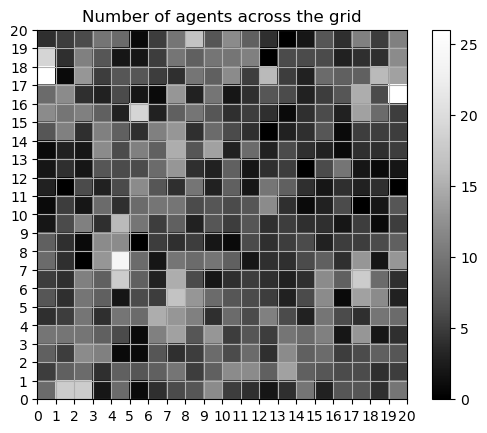

In [4]:
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, cmap="Greys_r", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of agents across the grid')
plt.colorbar()


# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()

As you can see from the above plot, after not many ticks, most agents are concentrated in a few cells. This is mainly due to the reds/majority moving to these 'wealthier' parcels (see third plot).

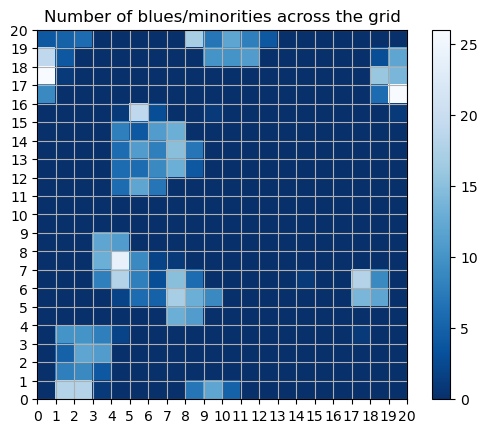

In [5]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    number_blues = 0
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        if agent.type == 1:
            number_blues += 1
    agent_counts[x][y] = number_blues
plt.imshow(agent_counts,  cmap="Blues_r",interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of blues/minorities across the grid')
plt.colorbar()

# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()

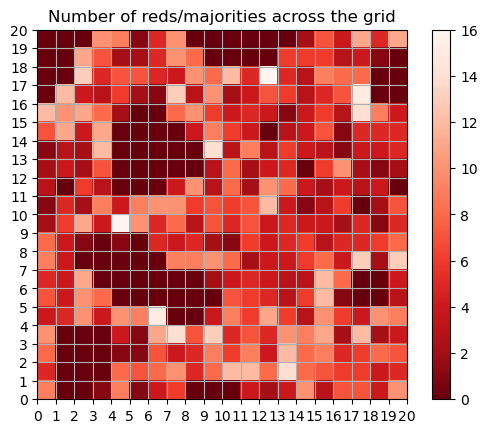

In [6]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    number_reds = 0
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        if agent.type == 0:
            number_reds += 1
    agent_counts[x][y] = number_reds
plt.imshow(agent_counts,cmap="Reds_r", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of reds/majorities across the grid')
plt.colorbar()

# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()

In [8]:
df = model.datacollector.get_model_vars_dataframe()

In [82]:
# find absolute max values for density and income

# max_income (if income stays the same across the entire model)
max_income = max([item for sublist in df.loc[0,"agent_incomes"].values() for item in sublist])
max_income = np.round(math.ceil(max_income/10))*10 # rounding up to nearest upper multiple of 10

# max agent density per cell
max_count = df.apply(lambda x: max(x.agent_counts.values()), axis = 1).max()
max_count = np.round(math.ceil(max_count/10))*10 # rounding up to nearest upper multiple of 10

(0.0, 120.0)

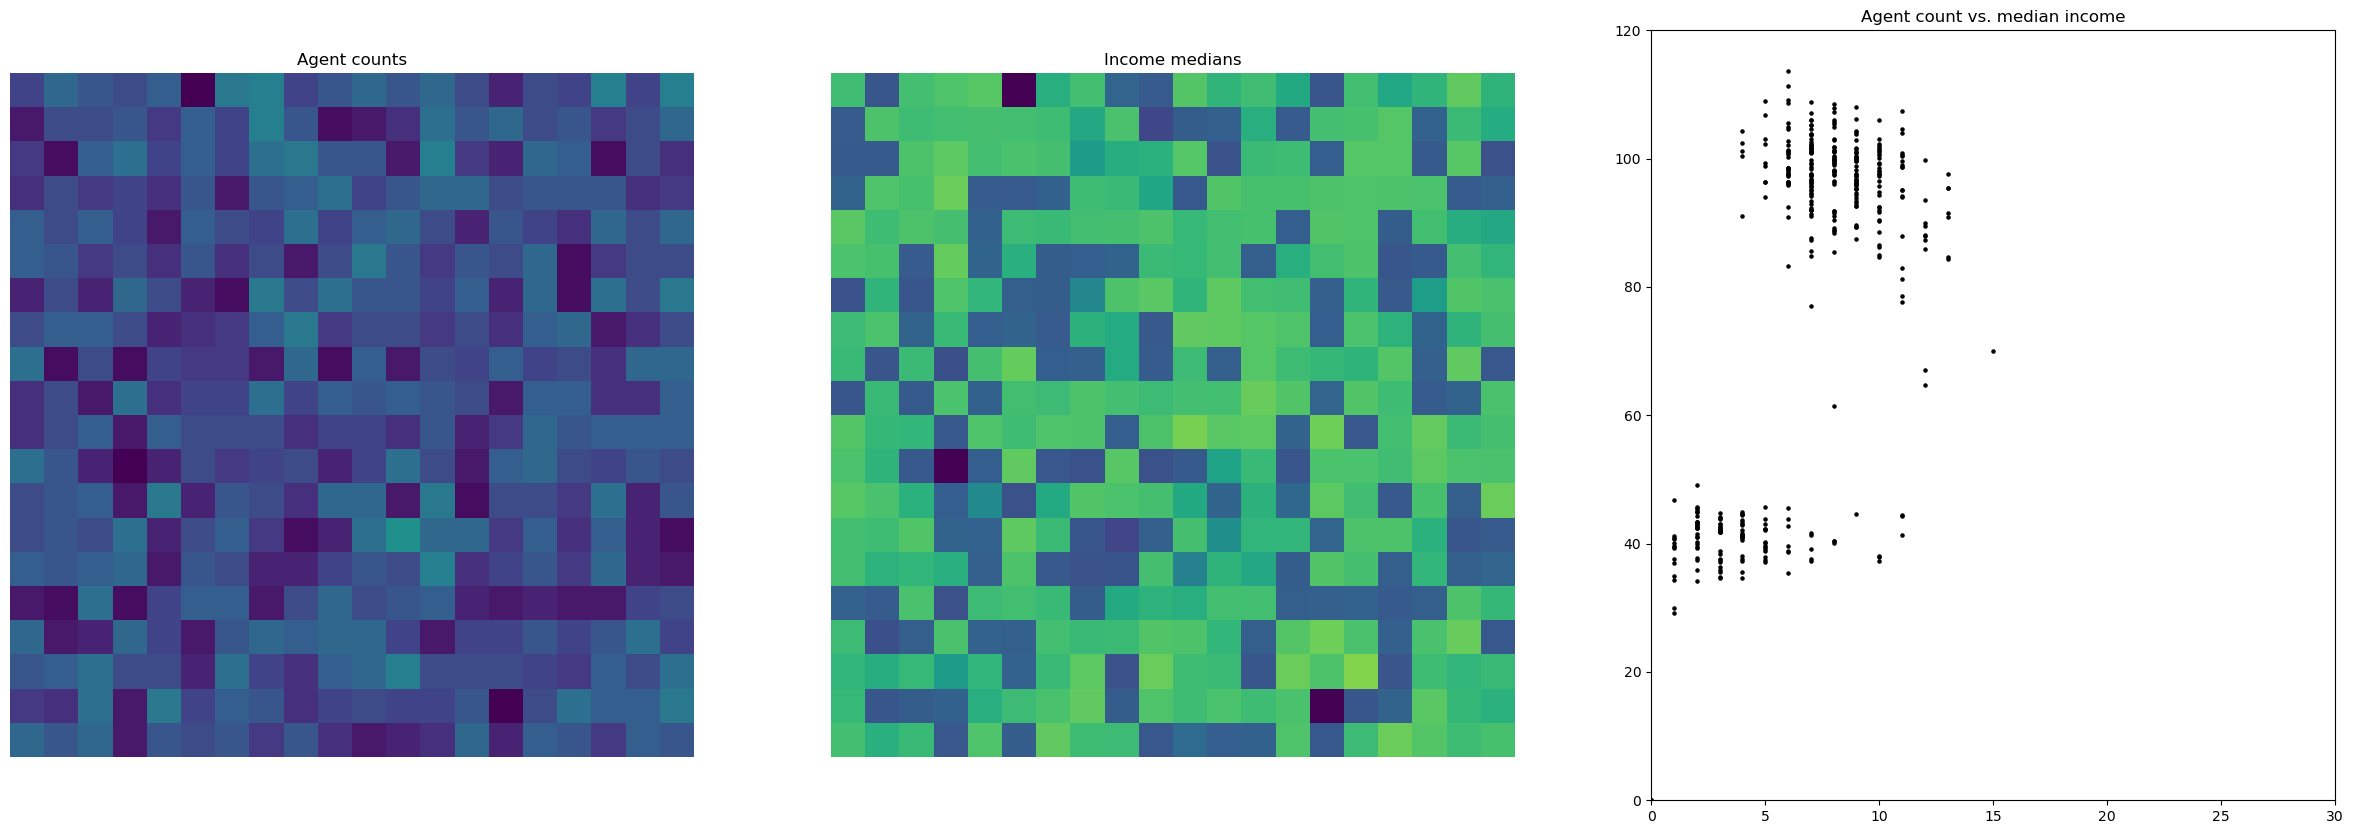

In [83]:
mystep = 1

fig, ax = plt.subplots(1,3, figsize = (30,10))

vals_counts_incomes = {}

# plot agent numbers
i = 0
vals_counts = np.zeros((model.width, model.height))
for k, v in df.loc[mystep, "agent_counts"].items():
    vals_counts_incomes[k] = {}
    vals_counts_incomes[k]["count"] = v
    vals_counts[k]=v
ax[i].imshow(
    vals_counts,
    vmin = 0,
    vmax = max_count
    )
ax[i].set_title("Agent counts")
ax[i].set_axis_off()

# plot agent mean incomes
i = 1
vals_incomes = np.zeros((model.width, model.height))
for k, v in df.loc[mystep, "agent_incomes"].items():
    vals_counts_incomes[k]["income"] = v
    if v:
        vals_incomes[k]=statistics.median(v)
ax[i].set_title("Income medians")
ax[i].imshow(
    vals_incomes,
    vmin = 0, 
    vmax = max_income,
    )
ax[i].set_axis_off()

# plot agent counts vs. median incomes
i = 2
ax[i].scatter(
    x = [v["count"] for v in vals_counts_incomes.values()],
    y = [statistics.median(v["income"]) if v["income"] else 0 for v in vals_counts_incomes.values()],
    s = 5,
    color = "black"
)
ax[i].set_title("Agent count vs. median income")
ax[i].set_xlim([0,30])
ax[i].set_ylim([0,120])


TypeError: float() argument must be a string or a real number, not 'Figure'

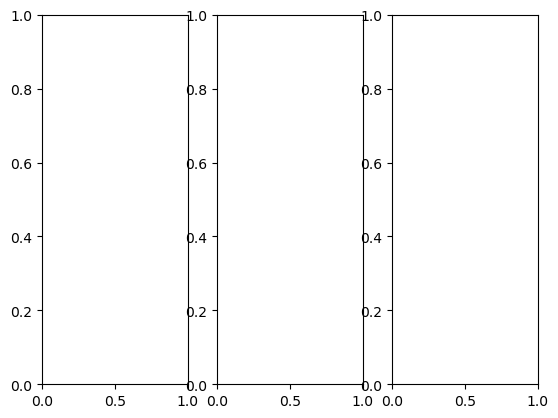

In [28]:
fig, axs = plt.subplots(1,3)
axs[0].plot(fig)

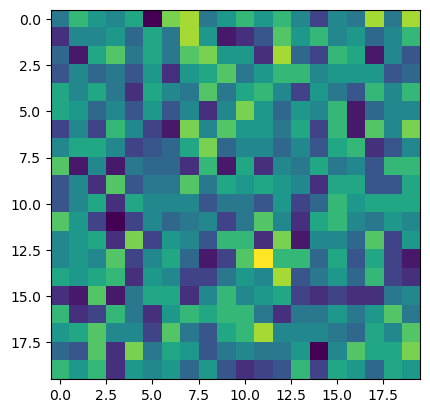

In [27]:
fig